<a href="https://colab.research.google.com/github/Seongjin1225/AI_SCHOOL_9_DataTon/blob/main/DenseNet201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.7/536.7 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.5 MB/s eta 0:00:00


# Full Numbers

In [ ]:
import numpy as np
import pandas as pd
import os

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from datasets import load_dataset
from sklearn.model_selection import train_test_split

In [ ]:
from datasets import load_dataset

train_dataset = load_dataset('svhn', 'full_numbers', split='train')
test_dataset = load_dataset('svhn', 'full_numbers', split='test')

train_dataset[0]['image']
train_dataset[0]['digits']

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/33402 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/13068 [00:00<?, ? examples/s]

Generating extra split:   0%|          | 0/202353 [00:00<?, ? examples/s]

{'bbox': [[38, 1, 21, 40], [57, 3, 16, 40]], 'label': [4, 6]}

In [ ]:
# 이미지 자르기
image_list = []
label_list = []

for x in train_dataset:
    for i in range(len(x['digits']['bbox'])):
        x_min, y_min, width, height = x['digits']['bbox'][i]  # bounding box의 좌표를 가져옵니다.
        right = x_min + width
        lower = y_min + height
        image_list.append(x['image'].crop((x_min, y_min, right, lower)))
        label_list.append(x['digits']['label'][i])

# 이미지 저장 경로
save_train_dir = '/content/save/train-images'

for i, img in enumerate(image_list):
    # 라벨에 해당하는 디렉토리 경로
    label_dir = os.path.join(save_train_dir, str(label_list[i]))

    # 라벨 디렉토리가 없으면 생성
    if not os.path.exists(label_dir):
        os.makedirs(label_dir)

    # 이미지 파일 경로
    img_path = os.path.join(label_dir, f'image_{i}.jpg')

    # 이미지 파일 저장
    img.save(img_path)


test_img_lst = []
test_label_lst = []

for data in test_dataset:
    for i in range(len(data['digits']['bbox'])):
        x, y, width, height = data['digits']['bbox'][i]  # bounding box의 좌표를 가져옵니다.
        right = x + width
        lower = y + height
        test_img_lst.append(data['image'].crop((x, y, right, lower)))
        test_label_lst.append(data['digits']['label'][i])

In [ ]:
# 테스트 이미지 자르기
image_test_list = []
label_test_list = []

for x in test_dataset:
    for i in range(len(x['digits']['bbox'])):
        x_min, y_min, width, height = x['digits']['bbox'][i]  # bounding box의 좌표를 가져옵니다.
        right = x_min + width
        lower = y_min + height
        image_test_list.append(x['image'].crop((x_min, y_min, right, lower)))
        label_test_list.append(x['digits']['label'][i])


# 이미지 저장 경로
save_test_dir = '/content/save/test-images'

for i, img in enumerate(image_test_list):
    # 라벨에 해당하는 디렉토리 경로
    label_dir = os.path.join(save_test_dir, str(label_test_list[i]))

    # 라벨 디렉토리가 없으면 생성
    if not os.path.exists(label_dir):
        os.makedirs(label_dir)

    # 이미지 파일 경로
    img_path = os.path.join(label_dir, f'image_{i}.jpg')

    # 이미지 파일 저장
    img.save(img_path)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=30,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(directory=save_train_dir,
                                                    classes=[str(i) for i in range(10)],
                                                    target_size=(224,224),
                                                    batch_size=32,
                                                    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2)

validation_generator = test_datagen.flow_from_directory(directory=save_test_dir,
                                                        classes=[str(i) for i in range(10)],
                                                        target_size=(224,224),
                                                        batch_size=32,
                                                        subset='validation',
                                                        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(directory=save_test_dir,
                                                  classes=[str(i) for i in range(10)],
                                                  target_size=(224,224),
                                                  batch_size=64,
                                                  subset='training',
                                                  class_mode='categorical')


Found 73257 images belonging to 10 classes.
Found 5201 images belonging to 10 classes.
Found 20831 images belonging to 10 classes.


In [ ]:
from tensorflow.keras.callbacks import Callback
from time import time
from tqdm import tqdm


class TqdmProgressCallback(Callback):

    def on_train_begin(self, logs=None):
        self.epochs = self.params['epochs']
        self.start_time = time()
        self.times = []

    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_start_time = time()
        print('\nEpoch %d/%d' % (epoch + 1, self.epochs))
        self.tqdm_bar = tqdm(total=self.params['steps'], position=0, leave=True)
        self.logs = {}

    def on_batch_end(self, batch, logs={}):
        self.tqdm_bar.update()
        self.logs = logs

    def on_epoch_end(self, epoch, logs={}):
        self.tqdm_bar.close()
        epoch_time = time() - self.epoch_start_time
        self.times.append(epoch_time)
        avg_time_per_epoch = sum(self.times) / len(self.times)
        remaining_time = avg_time_per_epoch * (self.epochs - epoch - 1)
        total_time = time() - self.start_time
        print(' - loss: %.4f - acc: %.4f - val_loss: %.4f - val_acc: %.4f - epoch_time: %.4f s - total_time: %.4f s - remaining_time: %.4f s' %
              (logs['loss'], logs['acc'], logs['val_loss'], logs['val_acc'], epoch_time, total_time, remaining_time))

In [ ]:
from keras.applications import DenseNet201

model_base = DenseNet201(weights='imagenet',
                      include_top=False,
                      input_shape=(224,224,3))

model_base.trainable = False

model_base.summary()

74836368/74836368 [==============================] - 3s 0us/step
Model: "densenet201"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 230, 230, 3)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormali

In [ ]:
model = Sequential()

model.add(model_base)

# classifier를 구현

model.add(Flatten())

# Hidden Layer
model.add(Dense(units=512,
                activation='relu'))

model.add(Dropout(rate=0.5))

# Output Layer
model.add(Dense(units=10,
                activation='softmax'))

# model.summary()

model.compile(optimizer=Adam(learning_rate=1e-6),
              loss='categorical_crossentropy',
              metrics=['acc'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 flatten (Flatten)           (None, 94080)             0         
                                                                 
 dense (Dense)               (None, 512)               48169472  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 66496586 (253.66 MB)
Trainable params: 48174602 (183.77 MB)
Non-trainable params: 18321984 (69.89 MB)
_________________________________________________________________


In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch=256,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps=163,
                    verbose=0,
                    callbacks=[TqdmProgressCallback()]
                    )


Epoch 1/10


100%|██████████| 256/256 [02:11<00:00,  1.94it/s]


 - loss: 2.3296 - acc: 0.1748 - val_loss: 2.0765 - val_acc: 0.2871 - epoch_time: 131.6740 s - total_time: 131.7222 s - remaining_time: 1185.0663 s

Epoch 2/10


100%|██████████| 256/256 [01:50<00:00,  2.31it/s]


 - loss: 2.1392 - acc: 0.2554 - val_loss: 1.9694 - val_acc: 0.3346 - epoch_time: 110.8978 s - total_time: 242.6380 s - remaining_time: 970.2873 s

Epoch 3/10


100%|██████████| 256/256 [01:46<00:00,  2.40it/s]


 - loss: 2.0441 - acc: 0.2925 - val_loss: 1.9020 - val_acc: 0.3738 - epoch_time: 106.4758 s - total_time: 349.1322 s - remaining_time: 814.4445 s

Epoch 4/10


100%|██████████| 256/256 [01:44<00:00,  2.44it/s]


 - loss: 1.9786 - acc: 0.3231 - val_loss: 1.8367 - val_acc: 0.3888 - epoch_time: 104.9092 s - total_time: 454.0575 s - remaining_time: 680.9353 s

Epoch 5/10


100%|██████████| 256/256 [01:45<00:00,  2.42it/s]


 - loss: 1.9147 - acc: 0.3470 - val_loss: 1.7860 - val_acc: 0.4255 - epoch_time: 105.8749 s - total_time: 559.9509 s - remaining_time: 559.8317 s

Epoch 6/10


100%|██████████| 256/256 [01:46<00:00,  2.41it/s]


 - loss: 1.8663 - acc: 0.3629 - val_loss: 1.7490 - val_acc: 0.4474 - epoch_time: 106.2536 s - total_time: 666.2272 s - remaining_time: 444.0569 s

Epoch 7/10


100%|██████████| 256/256 [01:44<00:00,  2.45it/s]


 - loss: 1.8149 - acc: 0.3845 - val_loss: 1.7147 - val_acc: 0.4547 - epoch_time: 104.7057 s - total_time: 770.9532 s - remaining_time: 330.3391 s

Epoch 8/10


100%|██████████| 256/256 [01:46<00:00,  2.41it/s]


 - loss: 1.7880 - acc: 0.3876 - val_loss: 1.6798 - val_acc: 0.4738 - epoch_time: 106.1002 s - total_time: 877.0733 s - remaining_time: 219.2228 s

Epoch 9/10


100%|██████████| 256/256 [01:45<00:00,  2.43it/s]


 - loss: 1.7702 - acc: 0.3954 - val_loss: 1.6512 - val_acc: 0.4893 - epoch_time: 105.5126 s - total_time: 982.6043 s - remaining_time: 109.1560 s

Epoch 10/10


100%|██████████| 256/256 [01:46<00:00,  2.41it/s]

 - loss: 1.7207 - acc: 0.4178 - val_loss: 1.6242 - val_acc: 0.4949 - epoch_time: 106.1718 s - total_time: 1088.8017 s - remaining_time: 0.0000 s


In [ ]:
from tensorflow.keras.models import load_model

# model.save('/content/drive/MyDrive/DataTon/model/try_2(res50).h5')
model.save('/content/drive/MyDrive/DataTon/model/dense_1.keras')

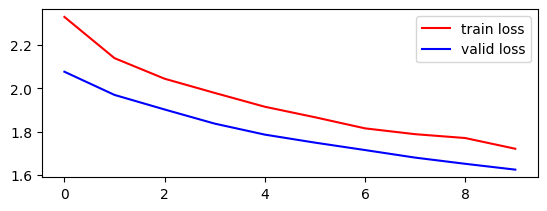

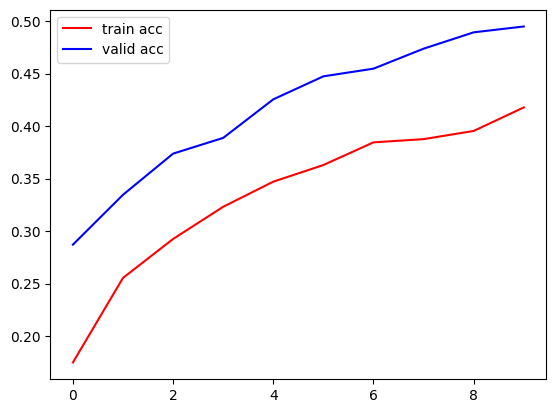

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()

train_loss = history.history['loss']
valid_loss = history.history['val_loss']

train_acc = history.history['acc']
valid_acc = history.history['val_acc']

fig.add_subplot(2,1,1)
plt.plot(train_loss, label='train loss', color='r')
plt.plot(valid_loss, label='valid loss', color='b')
plt.legend()
plt.show()

fig.add_subplot(2,1,2)
plt.plot(train_acc, label='train acc', color='r')
plt.plot(valid_acc, label='valid acc', color='b')
plt.legend()
plt.show()


In [ ]:
min_train_loss = min(history.history['loss'])
min_valid_loss = min(history.history['val_loss'])

# 훈련 및 검증 정확도의 최대값
max_train_acc = max(history.history['acc'])
max_valid_acc = max(history.history['val_acc'])

# ResNet50의 최대 정확도 값
densenet201_max_acc = max(history.history['val_acc'])

print("Train Loss 최소값:", min_train_loss)
print("Valid Loss 최소값:", min_valid_loss)
print("Train Accuracy 최대값:", max_train_acc)
print("Valid Accuracy 최대값:", max_valid_acc)
print("DenseNet201 + classifier Max ACC :", densenet201_max_acc)

Train Loss 최소값: 1.7206841707229614
Valid Loss 최소값: 1.6241950988769531
Train Accuracy 최대값: 0.4177989959716797
Valid Accuracy 최대값: 0.4949048161506653
DenseNet201 + classifier Max ACC : 0.4949048161506653


In [ ]:
from keras.applications import DenseNet201

model_base = DenseNet201(weights='imagenet',
                      include_top=False,
                      input_shape=(224,224,3))

num = 1
for layer in model_base.layers:
    if num >= 3:
        layer.trainable=True
    else:
        layer.trainable=False
    num += 1

In [ ]:
model = load_model('/content/drive/MyDrive/DataTon/model/try.keras')

num = 1
for layer in model.layers:
    if num >= 3:
        layer.trainable=True
    else:
        layer.trainable=False
    num += 1

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 flatten (Flatten)           (None, 94080)             0         
                                                                 
 dense (Dense)               (None, 512)               48169472  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 66496586 (253.66 MB)
Trainable params: 48174602 (183.77 MB)
Non-trainable params: 18321984 (69.89 MB)
_________________________________________________________________


In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch=200,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps=163,
                    verbose=0,
                    callbacks=[TqdmProgressCallback()]
                    )


Epoch 1/10


100%|██████████| 200/200 [01:41<00:00,  1.96it/s]


 - loss: 1.3087 - acc: 0.5472 - val_loss: 1.2222 - val_acc: 0.5985 - epoch_time: 101.9441 s - total_time: 101.9641 s - remaining_time: 917.4969 s

Epoch 2/10


100%|██████████| 200/200 [01:34<00:00,  2.13it/s]


 - loss: 1.2817 - acc: 0.5594 - val_loss: 1.2157 - val_acc: 0.5903 - epoch_time: 94.0791 s - total_time: 196.0640 s - remaining_time: 784.0928 s

Epoch 3/10


100%|██████████| 200/200 [01:33<00:00,  2.14it/s]


 - loss: 1.2501 - acc: 0.5699 - val_loss: 1.1788 - val_acc: 0.6026 - epoch_time: 93.4021 s - total_time: 289.4853 s - remaining_time: 675.3257 s

Epoch 4/10


100%|██████████| 200/200 [01:32<00:00,  2.17it/s]


 - loss: 1.2675 - acc: 0.5670 - val_loss: 1.1801 - val_acc: 0.6206 - epoch_time: 92.1274 s - total_time: 381.6328 s - remaining_time: 572.3290 s

Epoch 5/10


100%|██████████| 200/200 [01:34<00:00,  2.12it/s]


 - loss: 1.2623 - acc: 0.5708 - val_loss: 1.1539 - val_acc: 0.6214 - epoch_time: 94.4369 s - total_time: 476.0888 s - remaining_time: 475.9896 s

Epoch 6/10


100%|██████████| 200/200 [01:31<00:00,  2.18it/s]


 - loss: 1.2332 - acc: 0.5788 - val_loss: 1.1426 - val_acc: 0.6170 - epoch_time: 91.9202 s - total_time: 568.0284 s - remaining_time: 378.6065 s

Epoch 7/10


100%|██████████| 200/200 [01:27<00:00,  2.29it/s]


 - loss: 1.2383 - acc: 0.5713 - val_loss: 1.1660 - val_acc: 0.6049 - epoch_time: 87.4050 s - total_time: 655.4561 s - remaining_time: 280.8492 s

Epoch 8/10


100%|██████████| 200/200 [01:27<00:00,  2.28it/s]


 - loss: 1.2238 - acc: 0.5820 - val_loss: 1.1490 - val_acc: 0.6203 - epoch_time: 87.8285 s - total_time: 743.3028 s - remaining_time: 185.7858 s

Epoch 9/10


100%|██████████| 200/200 [01:28<00:00,  2.27it/s]


 - loss: 1.2333 - acc: 0.5759 - val_loss: 1.1079 - val_acc: 0.6349 - epoch_time: 88.0536 s - total_time: 831.3748 s - remaining_time: 92.3552 s

Epoch 10/10


100%|██████████| 200/200 [01:27<00:00,  2.28it/s]

 - loss: 1.2090 - acc: 0.5855 - val_loss: 1.1159 - val_acc: 0.6326 - epoch_time: 87.8524 s - total_time: 919.2477 s - remaining_time: 0.0000 s


In [ ]:
model.save('/content/drive/MyDrive/DataTon/model/dense_1_ft.keras')

In [ ]:
# 파일명 : 숫자이미지가 들어 있는 파일명
# height: 이미지안에 들어 있는 숫자영역 사각형의 높이
# left: 이미지안에 들어 있는 숫자영역 사각형의 왼쪽 좌표
# top: 이미지안에 들어 있는 숫자영역 사각형의 위쪽 좌표
# width: 이미지안에 들어 있는 숫자영역 사각형의 너비
# label: 이미지안에 들어 있는 숫자영역 사각형안의 숫자에 대한 label
# 파일명	height	left	top	width	label

In [ ]:
# 테스트 파일 불러오기
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/DataTon/data.csv')
df.head(5)

,파일명,height,left,top,width,label
0,1.png,219,246,77,81,1
1,1.png,219,323,81,96,9
2,2.png,32,77,29,23,2
3,2.png,32,98,25,26,3
4,3.png,15,17,5,8,2


In [ ]:
import os
from PIL import Image
# 이동할 폴더 경로 설정
folder_path = "/content/drive/MyDrive/DataTon/데이터톤 테스트셋"

# 폴더로 이동
directory = os.chdir(folder_path)

# 현재 디렉토리 안의 모든 파일과 디렉토리 리스트 가져오기
file_list = os.listdir(directory)
print(len(file_list))
print(sorted(file_list))

239
['1.png', '10.png', '100.png', '101.png', '102.png', '103.png', '104.png', '105.png', '106.png', '107.png', '108.png', '109.png', '11.png', '110.png', '111.png', '112.png', '113.png', '114.png', '115.png', '116.png', '117.png', '118.png', '119.png', '12.png', '120.png', '121.png', '122.png', '123.png', '124.png', '125.png', '126.png', '127.png', '128.png', '129.png', '13.png', '130.png', '131.png', '132.png', '133.png', '134.png', '135.png', '136.png', '137.png', '138.png', '139.png', '14.png', '140.png', '141.png', '142.png', '143.png', '144.png', '145.png', '146.png', '147.png', '148.png', '149.png', '15.png', '150.png', '151.png', '152.png', '153.png', '154.png', '155.png', '156.png', '157.png', '158.png', '159.png', '16.png', '160.png', '161.png', '162.png', '163.png', '164.png', '165.png', '166.png', '167.png', '168.png', '169.png', '17.png', '170.png', '171.png', '172.png', '173.png', '174.png', '175.png', '176.png', '177.png', '178.png', '179.png', '18.png', '180.png', '181.

In [ ]:
import os
from PIL import Image
# 이동할 폴더 경로 설정
folder_path = "/content/drive/MyDrive/DataTon/데이터톤 테스트셋"

image_eval_list = []
label_eval_list = []

# PNG 파일만 필터링하여 출력하기
cnt=0
for k in range(1,240):
    filename = f'{k}.png'
    image_path = os.path.join(folder_path, filename)
    try:
        img = Image.open(image_path)

        # 이미지 데이터 처리

        num = len(df[df['파일명']==filename])
        for i in range(num):
            x_min, y_min, width, height = df['left'][cnt], df['top'][cnt], df['width'][cnt], df['height'][cnt]
            # print(x_min, y_min, width, height)
            right = x_min + width
            lower = y_min + height

            image_eval_list.append(img.crop((x_min, y_min, right, lower)))
            # print(df['label '][cnt])
            label_eval_list.append(df['label '][cnt])
            cnt+=1

        # 이미지 닫기
        img.close()

    except FileNotFoundError:
        cnt+=1

In [ ]:
# 이미지 저장 경로
save_eval_dir = '/content/save/eval-images'

for i, img in enumerate(image_eval_list):

    # 라벨에 해당하는 디렉토리 경로
    label_eval_dir = os.path.join(save_eval_dir, str(label_eval_list[i]))

    # 라벨 디렉토리가 없으면 생성
    if not os.path.exists(label_eval_dir):
        os.makedirs(label_eval_dir)

    # 이미지 파일 경로
    img_path = os.path.join(label_eval_dir, f'image_{i}.jpg')

    # 이미지 파일 저장
    img.save(img_path)

In [ ]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

# 이미지 리스트 리사이즈
# resized_images = [img.resize((100, 200)) for img in image_list]

# 이미지 데이터를 Numpy 배열로 변환
# image_array = np.array([image.img_to_array(img) for img in resized_images])

# 레이블 데이터를 Numpy 배열로 변환
# label_array = np.array(label_list)

save_eval_dir = '/content/save/eval-images'
batch_size = 32

# ImageDataGenerator를 사용하여 데이터 증강 설정
eval_libdatagen = ImageDataGenerator(rescale=1/255)

eval_generator = eval_libdatagen.flow_from_directory(directory=save_eval_dir,
                                                      classes=[str(i) for i in range(10)],
                                                      target_size=(224, 224),
                                                      batch_size=batch_size,
                                                      # subset='validation',
                                                      class_mode='categorical'
                                                      )


Found 480 images belonging to 10 classes.


In [ ]:
from tensorflow.keras.models import load_model
model_path = '/content/drive/MyDrive/DataTon/model/dense_1_ft.keras'
loaded_model = load_model(model_path)
loss, accuracy = loaded_model.evaluate(eval_generator)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

15/15 [==============================] - 7s 143ms/step - loss: 0.9628 - acc: 0.6729
Loss: 0.9628336429595947
Accuracy: 0.6729166507720947


# 테스트 데이터

In [ ]:
# import os

# folder_path = '/content/drive/MyDrive/DataTon/TestData'

# test_image_list = []
# file_names = []

# # 폴더 내 파일 목록 조회
# for filename in os.listdir(folder_path):
#     if filename.endswith(".png"):
#         image_path = os.path.join(folder_path, filename)
#         test_image_list.append(image_path)
#         file_names.append(filename)
# # 모델이 예측할 수 있도록 준비된 이미지 리스트 출력
# print(file_names)

In [ ]:
# 이미지 데이터 생성기 생성
folder_path = '/content/drive/MyDrive/DataTon/TestData'

datagen = ImageDataGenerator(rescale=1/255)  # 이미지 데이터를 0~1 사이 값으로 정규화

# 이미지 데이터를 불러오고 전처리하는 데이터 제너레이터 생성
test_generator = datagen.flow_from_directory(directory=folder_path,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='categorical',
                                             shuffle=False)

prediction = loaded_model.predict(test_generator)

file_names = [os.path.basename(file) for file in test_generator.filepaths]

df = pd.DataFrame({'파일명': file_names, 'label': np.argmax(prediction,axis=1)})
df.to_csv('/content/predictions.csv', index=False)

df.head()



# predict_labels = []
# for image_path in test_image_list:
#     # 이미지 불러오기 및 전처리
#     img = load_img(image_path, target_size=(224, 224))  # 이미지를 224x224 크기로 로드
#     img_array = img_to_array(img)/255  # 이미지를 numpy 배열로 변환
#     img_array = np.expand_dims(img_array, axis=0)  # 배치 차원 추가 (모델은 배치를 입력으로 받으므로)

#     # 예측 수행
#     prediction = loaded_model.predict(img_array)
#     predicted_label = np.argmax(prediction)

#     predict_labels.append(predicted_label)

# import pandas as pd
# df = pd.DataFrame({'파일명': file_names, 'label': predict_labels})

# # CSV 파일로 저장
# df.to_csv('/content/predictions.csv', index=False)

# df.head()

Found 0 images belonging to 0 classes.


ValueError: Asked to retrieve element 0, but the Sequence has length 0

# 제출 파일 생성

In [ ]:
# sub = pd.DataFrame()
# predictions = loaded_model.predict(eval_generator)

# # 파일명
# sub['파일명'] =  file_list

# # label 생성
# sub['label'] = [np.argmax(pred) for pred in predictions]

# # csv 파일 확인
# sub.to_csv('/content/submission.csv', index=False)
# print(sub.head(10))

# DenseNet201의 Layer 확인
- Fine Tuning 위해 사용

In [ ]:
# DenseNet201의 conv layer 확인
# from tensorflow.keras.applications import DenseNet201
# model_base = DenseNet201(weights='imagenet',
#                       include_top=False,
#                       input_shape=(224,224,3))

# num = 1
# cnt = 0
# for layer in model_base.layers:
#   if 'conv2d.Conv2D' in str(layer):
#     cnt += 1
#     print(layer, num,cnt)
#   num += 1

# 총 200개의 conv layer 확인

In [ ]:
# pooling layer 확인

# num = 1
# cnt = 0
# for layer in model_base.layers:
#   if 'max_pooling2d.MaxPooling2D' in str(layer):
#     cnt += 1
#     print(layer, num,cnt)
#   num += 1

In [ ]:
# average pooling 확인
# Average Pooling은 커널 영역의 평균값만 나타냄

# num = 1
# cnt = 0
# for layer in model_base.layers:
#   if 'average_pooling2d.AveragePooling2D' in str(layer):
#     cnt += 1
#     print(layer, num,cnt)
#   num += 1